# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid' , {'axis.axisbelow' : False})
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,RocCurveDisplay,auc

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [173]:
df = pd.read_csv('/content/drive/MyDrive/week 4 Night Solution/Datasets/Copy of Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [148]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [150]:
df.shape

(6324, 9)

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,6324.0,16.043327,8.956907,1.0,8.0,16.0,24.00,31.0
CarCount,6324.0,64.355629,44.307088,5.0,18.0,61.0,101.25,180.0
BikeCount,6324.0,12.013283,11.363955,0.0,3.0,9.0,19.00,70.0
BusCount,6324.0,12.557875,12.319831,0.0,1.0,10.0,20.00,50.0
TruckCount,6324.0,18.658128,10.724822,0.0,10.0,18.0,27.00,60.0
Total,6324.0,107.584915,55.850784,21.0,53.0,103.0,151.00,279.0


In [152]:
for col in df.columns:
  print(f'\n{df[col].value_counts()}\n')


Time
9:30:00 PM     77
7:15:00 PM     74
1:30:00 AM     73
9:00:00 PM     72
12:30:00 AM    72
               ..
5:15:00 PM     62
5:30:00 PM     62
5:45:00 PM     62
6:00:00 PM     62
12:00:00 PM    62
Name: count, Length: 96, dtype: int64


Date
27    211
31    211
26    208
19    208
13    208
4     208
3     207
8     207
20    206
21    205
29    205
14    204
16    204
22    204
30    204
1     203
28    203
23    203
5     203
24    203
6     203
18    203
15    203
12    203
9     202
11    201
17    200
10    199
2     199
7     198
25    198
Name: count, dtype: int64


Day of the week
Thursday     1020
Wednesday    1012
Tuesday      1011
Friday        832
Saturday      819
Sunday        816
Monday        814
Name: count, dtype: int64


CarCount
15     182
14     155
11     152
12     144
13     143
      ... 
178      1
169      1
166      1
170      1
163      1
Name: count, Length: 173, dtype: int64


BikeCount
1     525
2     518
0     508
5     365
4     284
     ... 
54

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [153]:
df.duplicated().sum()

0

In [154]:
df.isnull().sum().sum()

0

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

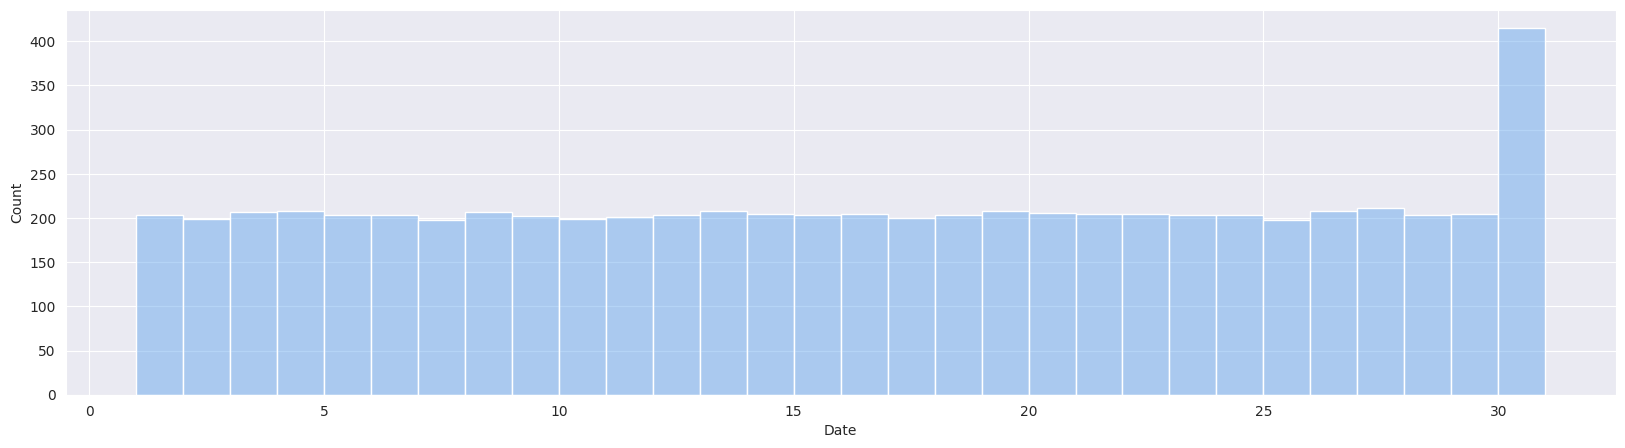

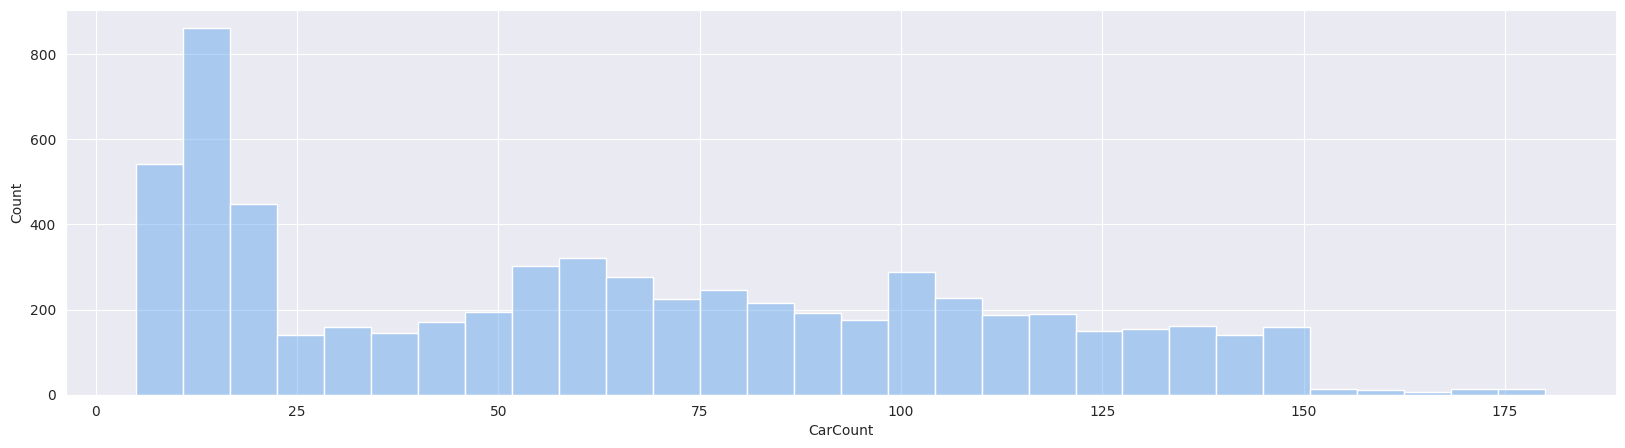

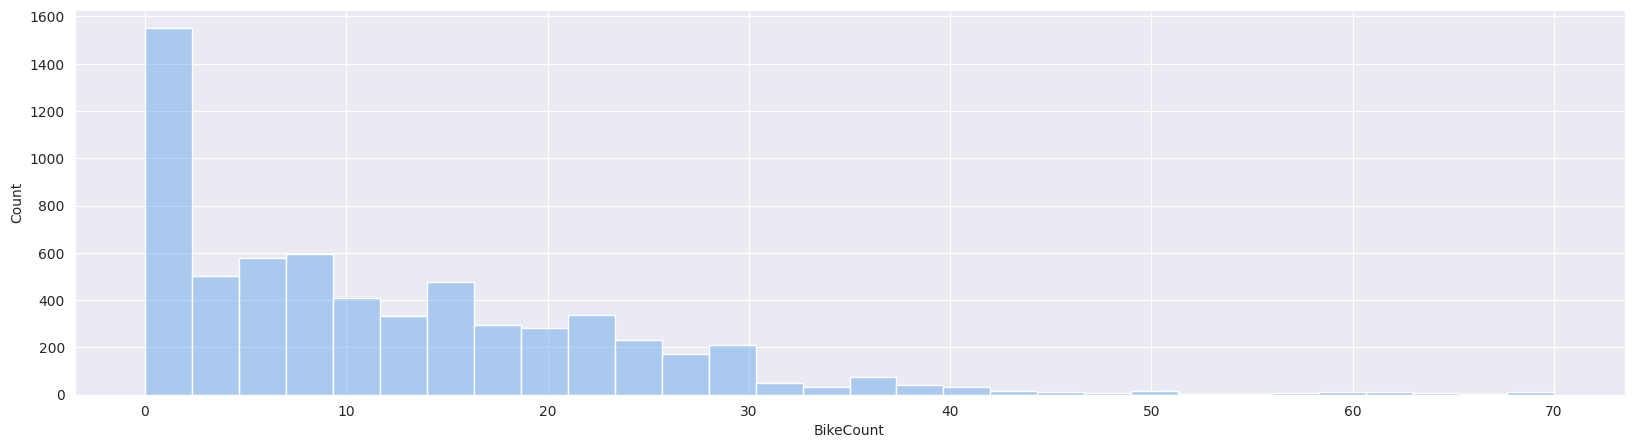

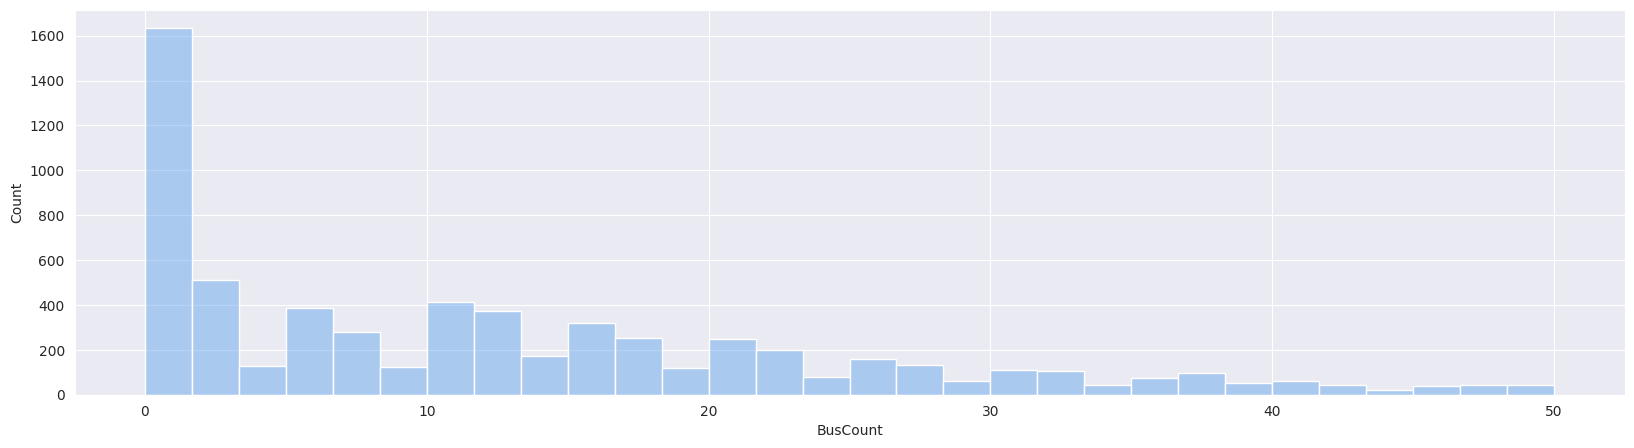

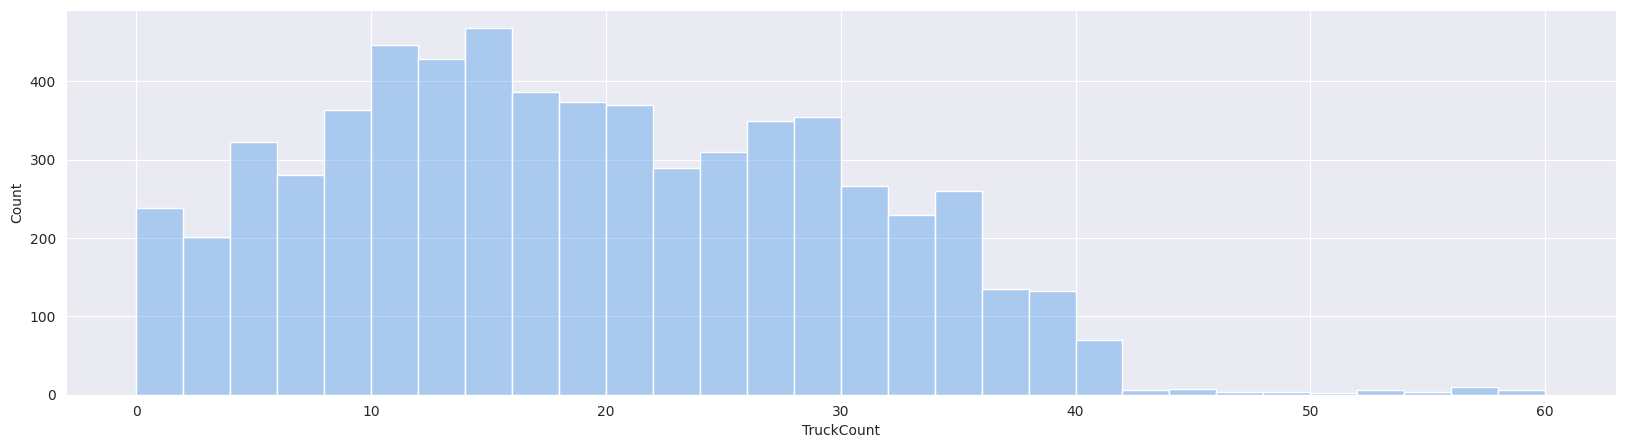

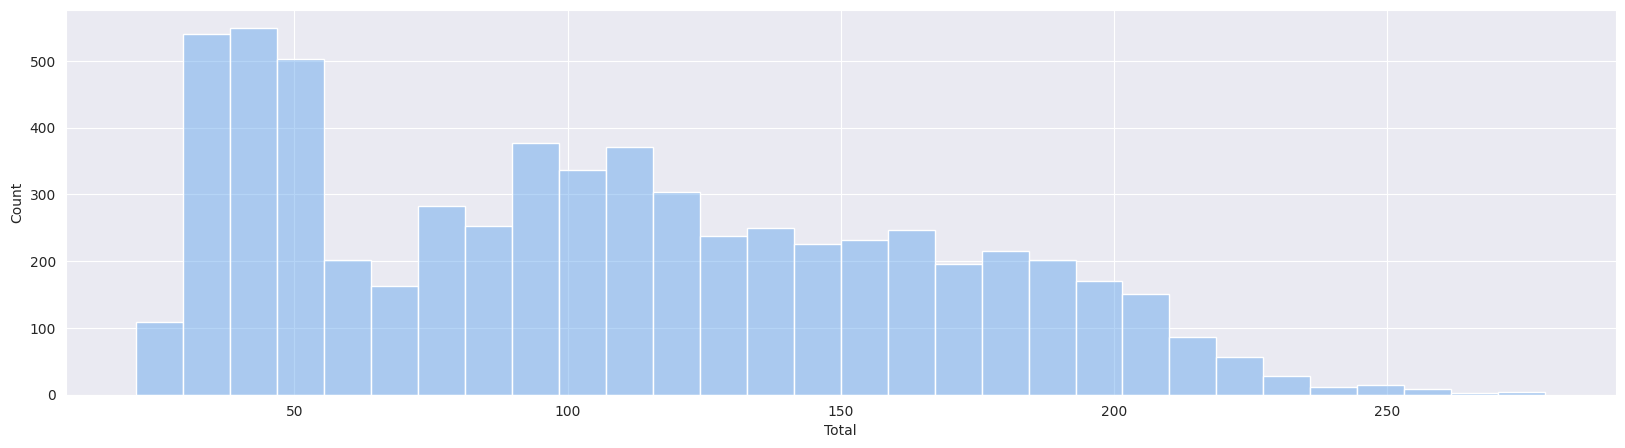

In [156]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize = (20,5))
  #bins = np.arange(df[col].min(),df[col].max()+1 , 1)
  sns.histplot(
      df[col],
      kde= False ,
      #hist_kws ={'alpha':1},
      color = '#6caaee' ,
      edgecolor ='white',
      bins =30 ,
      alpha = 0.5
  )
  plt.show()

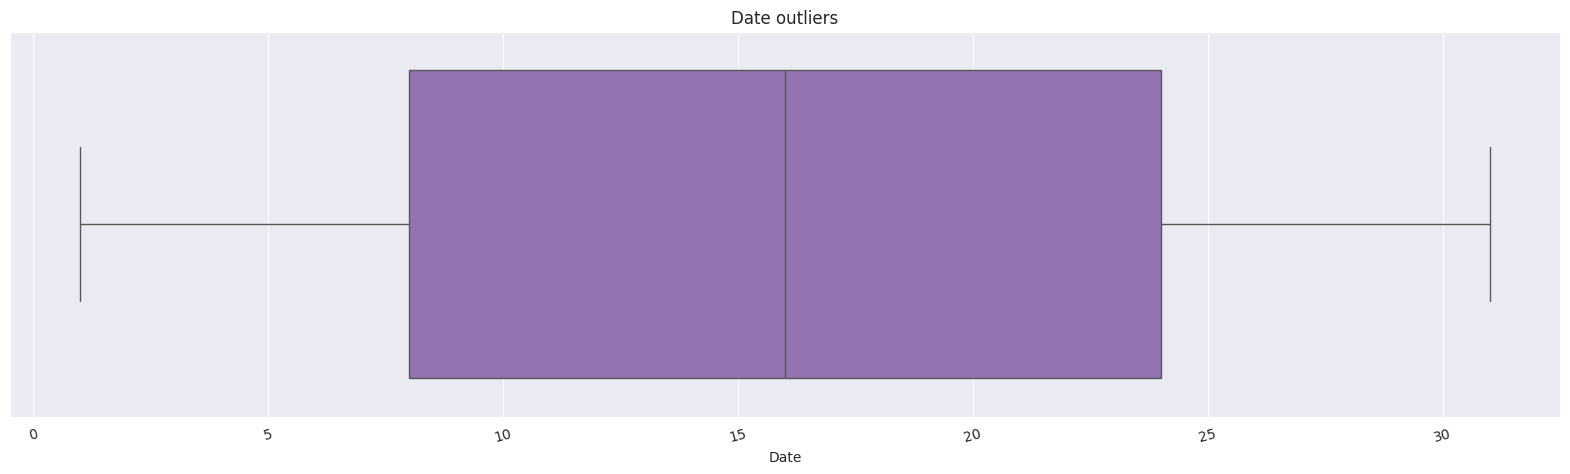

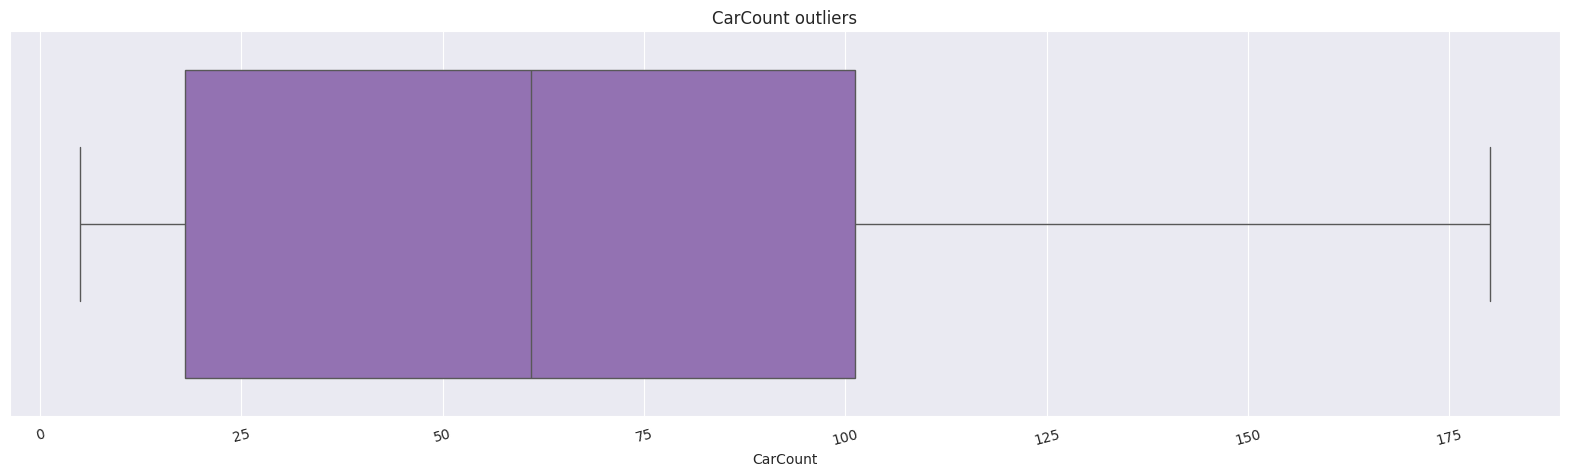

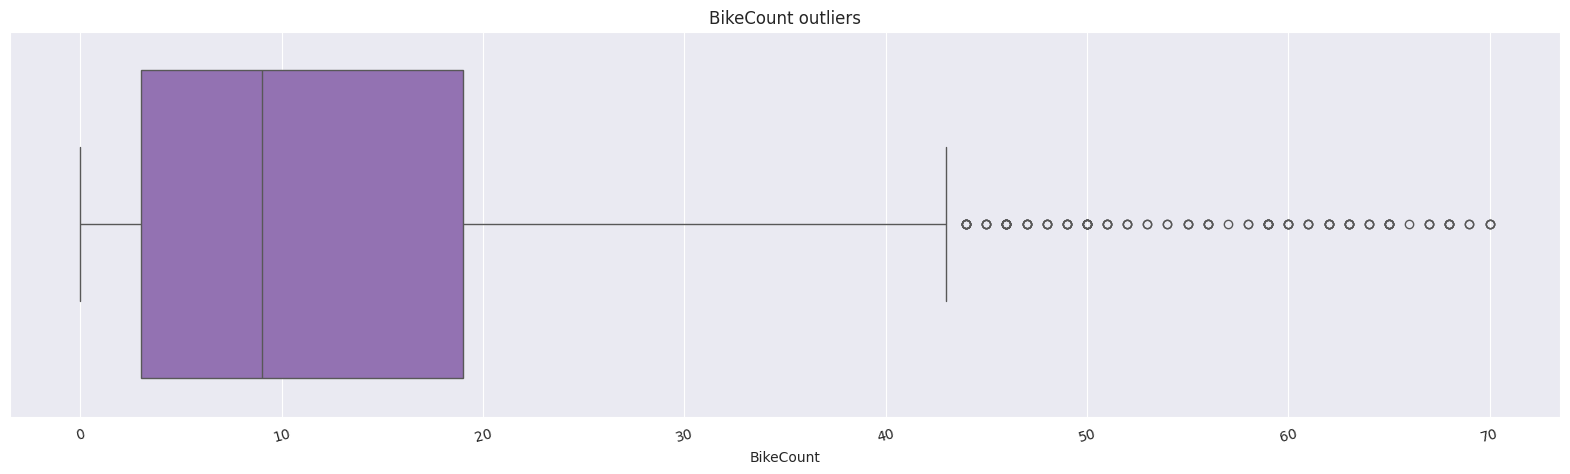

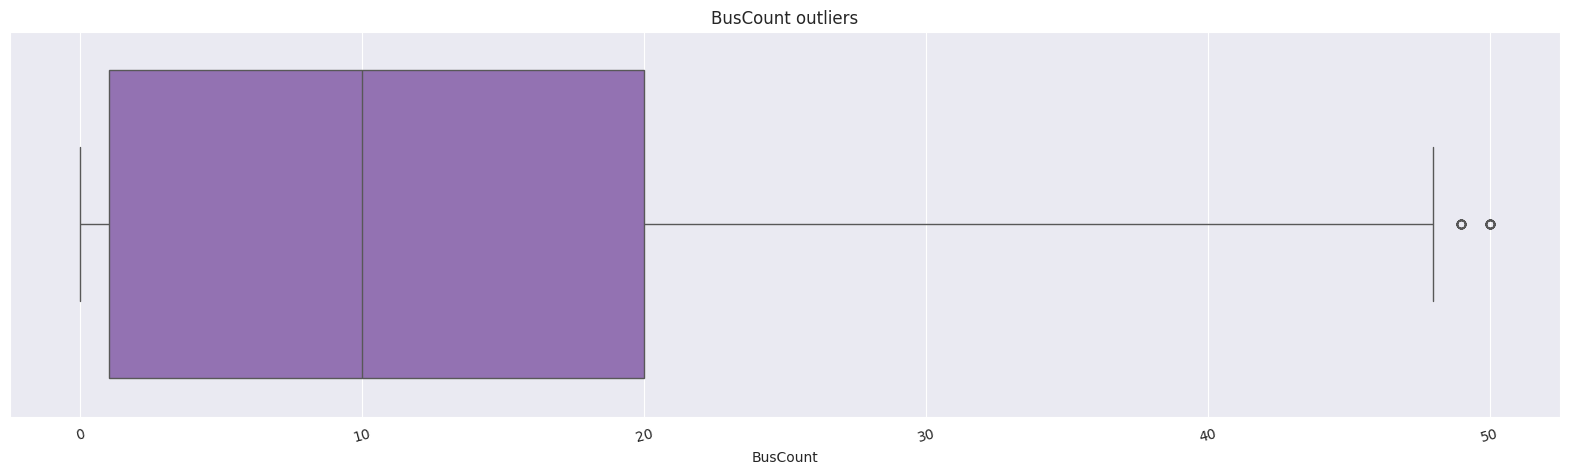

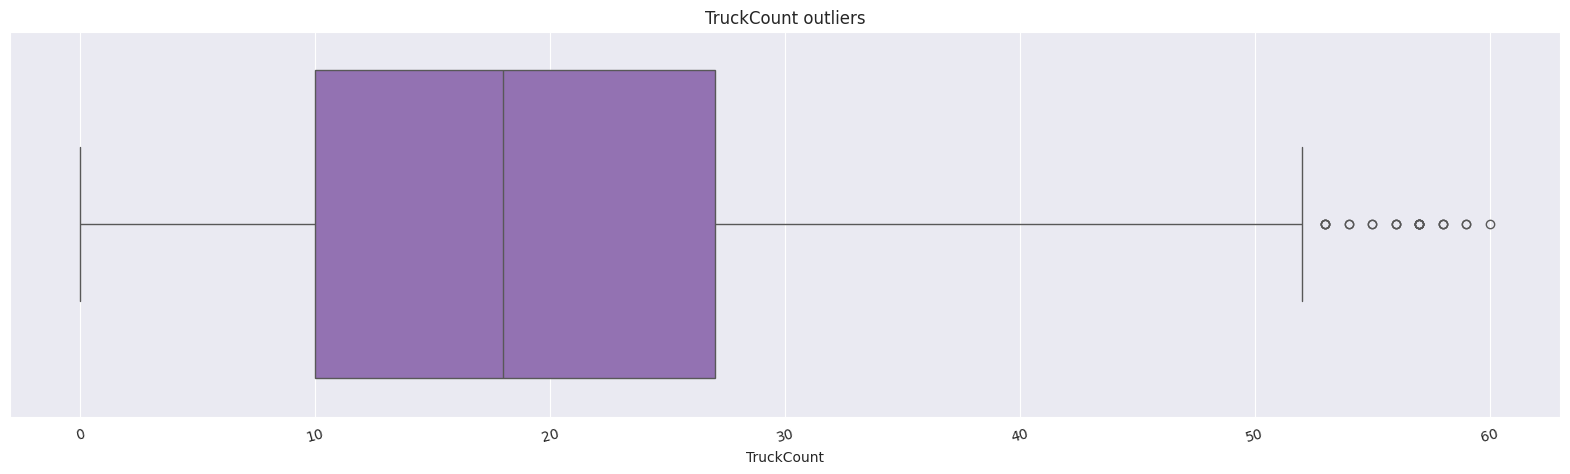

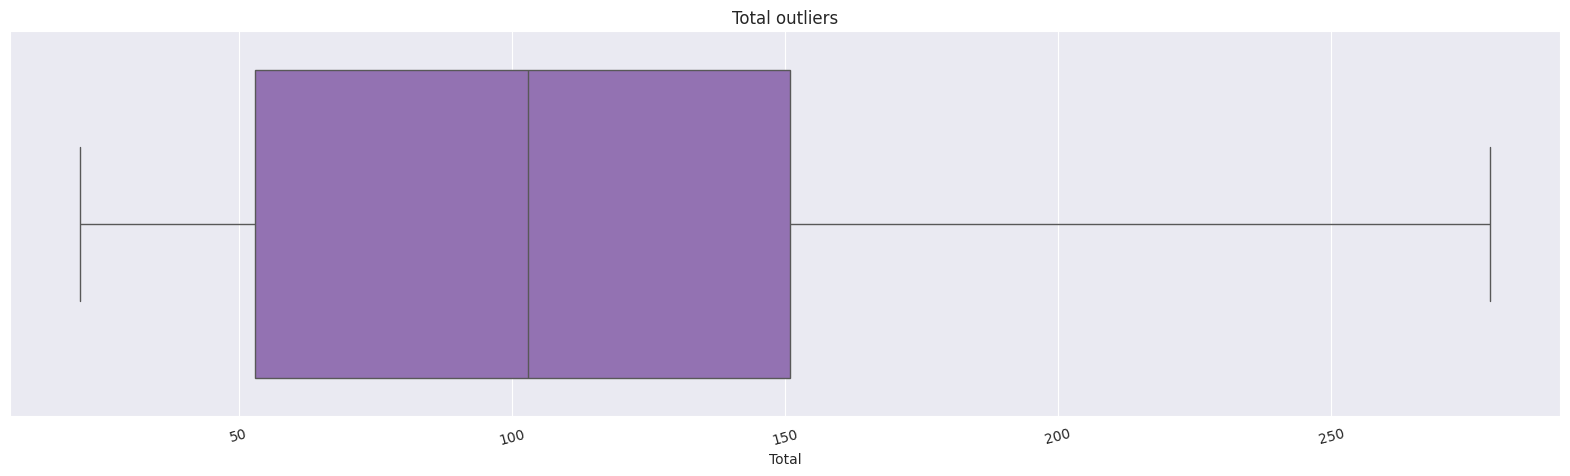

In [157]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(20,5))
  sns.boxplot(
      x= df[col],
      color = sns.color_palette()[4]
  )
  plt.xticks(rotation=15)
  plt.title(f'{col} outliers')
  plt.show()

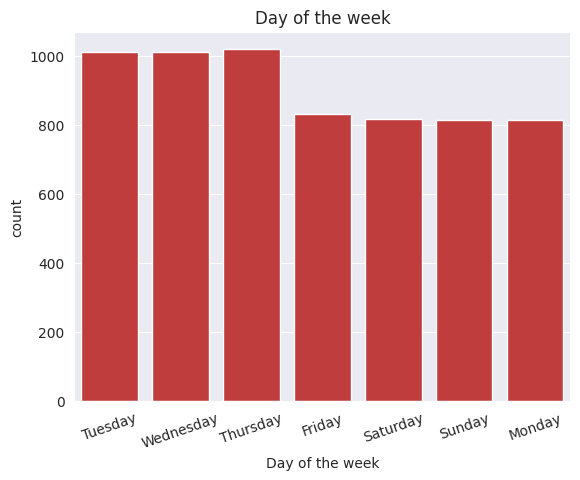

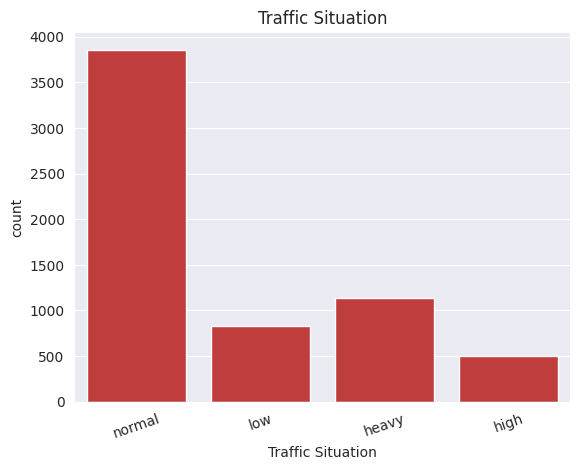

In [158]:
for col in df.select_dtypes(exclude='number').drop(columns=['Time']).columns:
  sns.countplot(
    data = df ,
    x = col ,
    color = sns.color_palette()[3]
)
  plt.xticks(rotation=19)
  plt.title(col)
  print()
  plt.show()

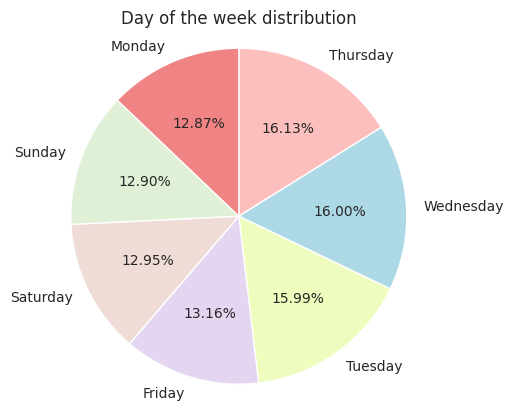

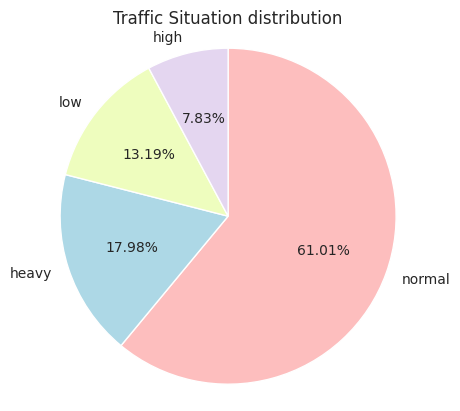

In [159]:
mycolors = ['#FDBEBE', 'lightblue','#EEFDBE','#E4D6F0','#F0DCD6','#DFF0D6','#F08484']
for col in df.select_dtypes(exclude='number').drop(columns=['Time']).columns:
  sorted_counts = df[col].value_counts()
  plt.pie(sorted_counts,
          labels = sorted_counts.index,
          startangle = 90,
          counterclock = False,
          colors = mycolors,
          autopct = '%0.2f%%' )
  plt.axis('square')
  plt.title(f'{col} distribution')
  plt.show()
  print()

In [160]:
df2 = df

In [161]:
encoding = LabelEncoder()
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = encoding.fit_transform(df2[col])

In [162]:
standard = StandardScaler()
df2 = pd.DataFrame(standard.fit_transform(df2), columns=df2.columns)

<Axes: >

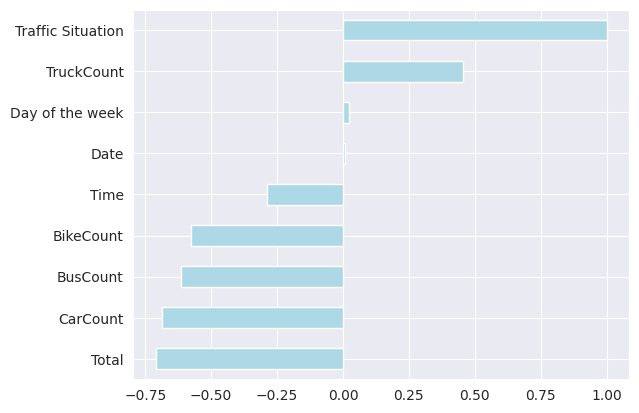

In [163]:
corr= df2.corr(numeric_only=True)
corr['Traffic Situation'].sort_values().plot.barh(color='lightblue')

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

# Initialize and Train the Classifiers

In [174]:
X = df.drop(columns=['Traffic Situation'], axis=1)
y = df['Traffic Situation']

numeric_features = df.select_dtypes(include='number').columns
numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler())])

categorical_features = df.drop(columns = ['Traffic Situation','Time' , 'Date','Day of the week'], axis=1).select_dtypes(exclude='number').columns
categorical_transformer = Pipeline(steps=[
    ('label_encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3 ,random_state=0)

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [178]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

model = model.fit(X_train, y_train)
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.853


In [179]:
enc = LabelEncoder()
y_test_encoded = enc.fit_transform(y_test)
y_train_encoded = enc.fit_transform(y_train)

### Evaluate the model performance

In [180]:
LRy_pred = model.predict(X_test)

In [181]:
fitted_prediction= enc.fit_transform(LRy_pred)
print("Logistic Regression \n\n\n")
print(f"Confusion Matrix\n {confusion_matrix(y_test,LRy_pred)}\n\n\n")
print(f"Accuracy Score\n {accuracy_score(y_test,LRy_pred)}\n\n\n")
print(f"F1 Score\n {f1_score(y_test,LRy_pred,average='micro')}\n\n\n")

Logistic Regression 



Confusion Matrix
 [[ 345    3    0    0]
 [   5   77    0   62]
 [   0    0  140  109]
 [  10   30   60 1057]]



Accuracy Score
 0.8530031612223393



F1 Score
 0.8530031612223393





## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [189]:
from xgboost import XGBClassifier
xgboost_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(n_estimators=100, random_state=42))])
xgboost_model.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('label_encoder',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

### Evaluate the model performance

In [191]:
xgboost_pred = xgboost_model.predict(X_test)
print(f'score: {accuracy_score(xgboost_pred, y_test_encoded)}')

score: 0.9056902002107482


In [201]:
print("xgboost Classifier: \n\n\n")
print(f"Confusion Matrix\n {confusion_matrix(y_test_encoded,xgboost_pred)}\n\n\n")
print(f"Accuracy Score\n {accuracy_score(y_test_encoded,xgboost_pred)}\n\n\n")
print(f"F1 Score\n {f1_score(y_test_encoded,xgboost_pred,average='micro')}\n\n\n")

xgboost Classifier: 



Confusion Matrix
 [[ 348    0    0    0]
 [   0  122    0   22]
 [   0    0  184   65]
 [   0   31   61 1065]]



Accuracy Score
 0.9056902002107482



F1 Score
 0.9056902002107482





## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [192]:
base_models = [
    ('decision_tree', XGBClassifier(random_state=42)),
    ('svc', RandomForestClassifier(random_state=42)),
]

### Define meta-learner (LogisticRegression)

In [193]:
meta_model = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [195]:
from sklearn.ensemble import StackingClassifier


Stacking_Classifier = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5))])
Stacking_Classifier.fit(X_train, y_train_encoded)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('label_encoder',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier...
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...)),
                                                ('svc',
                                                 RandomForestClassifier(random_state=42))],
                                    final_estimator=LogisticRegression()))])

### Evaluate the model performance

In [196]:
stac_pred = Stacking_Classifier.predict(X_test)

In [199]:
print("Stacking Classifier: \n\n\n")
print(f"Confusion Matrix\n {confusion_matrix(y_test_encoded,stac_pred)}\n\n\n")
print(f"Accuracy Score\n {accuracy_score(y_test_encoded,stac_pred)}\n\n\n")
print(f"F1 Score\n {f1_score(y_test_encoded,stac_pred,average='micro')}\n\n\n")

Stacking Classifier: 



Confusion Matrix
 [[ 348    0    0    0]
 [   0  120    0   24]
 [   0    0  174   75]
 [   0   26   56 1075]]



Accuracy Score
 0.90463645943098



F1 Score
 0.90463645943098





# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

* **Feature Selection and Engineering**

   - Which features did you find most important for predicting churn, and why do you think they are significant?
     ***Truck count as it is positivelt correlated with the target feature, as well as (bikecount , buscount , carcount and total) they are negatively correlated with the target features***


   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?
      ***I have not perform any engineering for features, however dividing the time into hours and mins and sec might lead us to important features , as well as dividing the total by the 4 (types of cars) might give us a thoughtful result.***


 * **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?

      ***Ensembling methods ensures us better results than the regul;ar models , take for example Bagging, it reduces the variance in the data points as well as it lessens overfitting in the model, as we saw with XGBoost model***

   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?   

      ***XGBoost model performed the best with the dataset , stacking follows it by a slight numbers.***


* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?
       ***I Have used Accuracy and F1-Score , as the target feature is imbalanced, accuracy will be the best fit metric for this problem, however I have added F1-Score regardledd to show the difference when unbalancement is shown.***
